# Part B
 In this part we will use word embeddings and our own automatic workflow to analyze the similarity of words before and after reconstruction. Calculate cosine similarity scores between the original and reconstructed versions and Visualize the word embeddings using PCA/t-SNE to demonstrate the shifts in semantic space.

In [22]:
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [28]:
#Load original texts
with open("paraphrased_text/text1.txt", "r") as f1, open("paraphrased_text/text2.txt", "r") as f2:
    original_text1 = f1.read().strip()
    original_text2 = f2.read().strip()
# Load benchmark texts
with open("paraphrased_text/benchmark_chatgpt_text1.txt", "r") as f1, open("paraphrased_text/benchmark_chatgpt_text2.txt", "r") as f2:
    benchmark_text1 = f1.read().strip()
    benchmark_text2 = f2.read().strip()
# Load ChatGPT T5 paraphrased texts
with open("paraphrased_text/chatgpt_t5_paraphrased_text1.txt", "r") as f1, open("paraphrased_text/chatgpt_t5_paraphrased_text2.txt", "r") as f2:
    chatgpt_t5_text1 = f1.read().strip()
    chatgpt_t5_text2 = f2.read().strip()
# Load Pegasus paraphrased texts
with open("paraphrased_text/pegasus_paraphrased_text1.txt", "r") as f1, open("paraphrased_text/pegasus_paraphrased_text2.txt", "r") as f2:
    pegasus_text1 = f1.read().strip()
    pegasus_text2 = f2.read().strip()
# Load BART paraphrased texts
with open("paraphrased_text/bart_paraphrased_text1.txt", "r") as f1, open("paraphrased_text/bart_paraphrased_text2.txt", "r") as f2:
    bart_text1 = f1.read().strip()
    bart_text2 = f2.read().strip()
# Load fixed sentences
with open("paraphrased_text/fixed_sentence1.txt", "r") as f1, open("paraphrased_text/fixed_sentence2.txt", "r") as f2:
    fixed_sentence1 = f1.read().strip()
    fixed_sentence2 = f2.read().strip()

texts_to_compare = [
    (original_text1, benchmark_text1, "Benchmark and Original Text1"),
    (original_text2, benchmark_text2, "Benchmark and Original Text2"),
    (benchmark_text1, chatgpt_t5_text1, "ChatGPT T5 and Benchmark Text1"),
    (benchmark_text2, chatgpt_t5_text2, "ChatGPT T5 and Benchmark Text2"),
    (benchmark_text1, pegasus_text1, "Pegasus and Benchmark Text1"),
    (benchmark_text2, pegasus_text2, "Pegasus and Benchmark Text2"),
    (benchmark_text1, bart_text1, "BART and Benchmark Text1"),
    (benchmark_text2, bart_text2, "BART and Benchmark Text2"),
    (benchmark_text1.splitlines()[2], fixed_sentence1, "Fixed Sentence1 and Benchmark Sentence1"),
    (benchmark_text2.splitlines()[1], fixed_sentence2, "Fixed Sentence2 and Benchmark Sentence2"),
]
texts = [
    original_text1, benchmark_text1, chatgpt_t5_text1, pegasus_text1, bart_text1,
    original_text2, benchmark_text2, chatgpt_t5_text2, pegasus_text2, bart_text2
]
labels = [
    "Original1", "Benchmark1", "ChatGPT-T5(1)", "Pegasus1", "BART1",
    "Original2", "Benchmark2", "ChatGPT-T5(2)", "Pegasus2", "BART2"
]

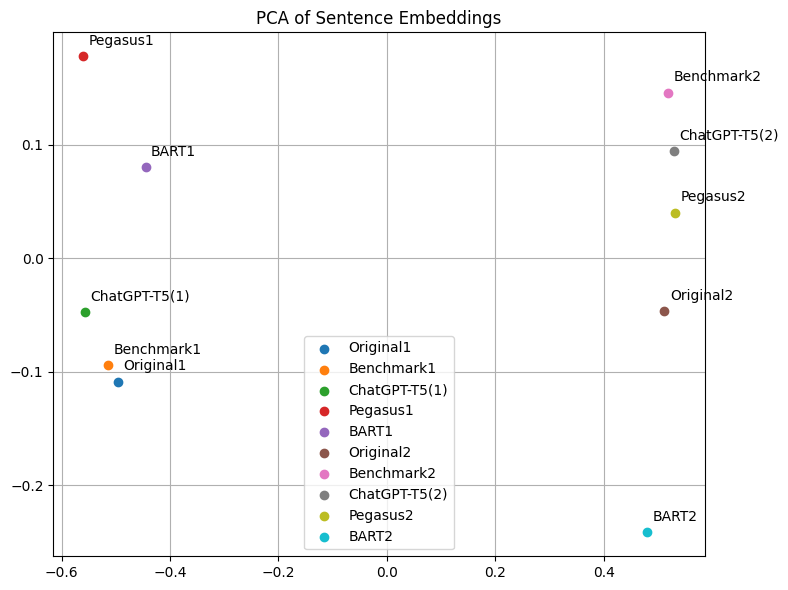

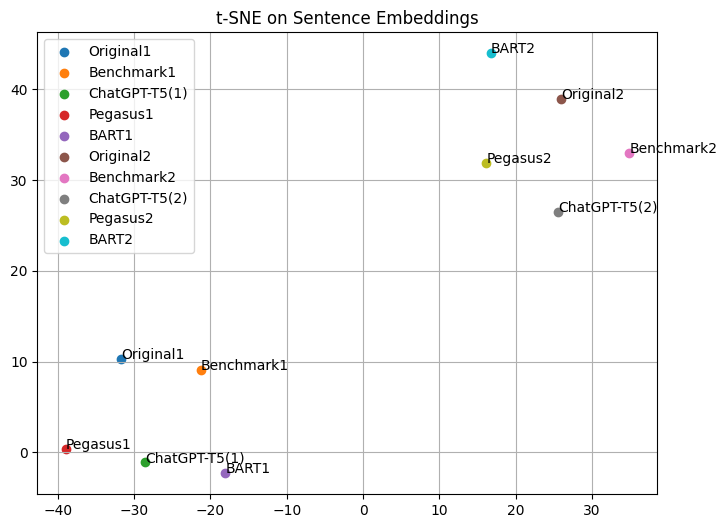

None

NLPAnalyzer-based Cosine Similarities:
Benchmark and Original Text1 : 0.9724
Benchmark and Original Text2 : 0.9320
ChatGPT T5 and Benchmark Text1 : 0.9631
ChatGPT T5 and Benchmark Text2 : 0.9332
Pegasus and Benchmark Text1 : 0.9165
Pegasus and Benchmark Text2 : 0.9052
BART and Benchmark Text1 : 0.9283
BART and Benchmark Text2 : 0.8868
Fixed Sentence1 and Benchmark Sentence1 : 0.9054
Fixed Sentence2 and Benchmark Sentence2 : 0.8726


In [31]:
class NLPAnalyzer:
    def __init__(self, model_name='all-MiniLM-L6-v2'):
        self.model = SentenceTransformer(model_name)

    def compute_similarity(self, text1, text2):
        emb1 = self.model.encode(text1, convert_to_tensor=True)
        emb2 = self.model.encode(text2, convert_to_tensor=True)
        return util.cos_sim(emb1, emb2).item()

    def preprocess_text(self, text):
        # Placeholder for any text preprocessing steps
        return text.lower().strip()
    def visualize_embeddings(self, texts,labels):
        embeddings = self.model.encode(texts)
        pca = PCA(n_components=2)
        reduced = pca.fit_transform(embeddings)

        plt.figure(figsize=(8, 6))
        for i, label in enumerate(labels):
            x, y = reduced[i]
            plt.scatter(x, y, label=label)
            plt.text(x + 0.01, y + 0.01, label)
        plt.title("PCA of Sentence Embeddings")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        tsne = TSNE(n_components=2, random_state=42, perplexity=5)
        reduced_tsne = tsne.fit_transform(embeddings)
        plt.figure(figsize=(8, 6))
        for i, label in enumerate(labels):
            plt.scatter(reduced_tsne[i, 0], reduced_tsne[i, 1], label=label)
            plt.text(reduced_tsne[i, 0] + 0.01, reduced_tsne[i, 1] + 0.01, label)
        plt.title("t-SNE on Sentence Embeddings")
        plt.legend()
        plt.grid()
        plt.show()

    def analyze_texts(self, texts):
        texts = [self.preprocess_text(text) for text in texts]
        similarities = []
        for i in range(len(texts)):
            for j in range(i + 1, len(texts)):
                sim = self.compute_similarity(texts[i], texts[j])
                similarities.append((texts[i], texts[j], sim))
        return similarities

    def run_analysis(self, texts,labels):
        similarities = self.analyze_texts(texts)
        self.visualize_embeddings(texts,labels)


analyzer = NLPAnalyzer()
print (analyzer.run_analysis(texts,labels))


print("\nNLPAnalyzer-based Cosine Similarities:")
for text1, text2, label in texts_to_compare:
    similarity = analyzer.compute_similarity(text1, text2)
    print(f"{label} : {similarity:.4f}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!



Concept Clusters:
Cluster 18: doctor, celebrate, grateful, best, final, new, week, let, missed, thank, proceeding, submission, delay, wish, update, show, target, include, planning, happiness
Cluster 17: springer, section, discussion, time, communicative, collaboration, little, culture—a
Cluster 3: full, day, coffee, last, please, acceptance, see, autumn, take
Cluster 0: safe, remind, change, shared, segment
Cluster 7: today, publication, think, part, complete
Cluster 8: festival, thanks
Cluster 14: professor, boat, version, helping, couple, edited, news, witness, backing, well-being, opportunity
Cluster 11: received, future, appreciated, tried, edit, cooperation, experiencing, submission—the, seem, reduced
Cluster 4: effort, waiting, support, checking, sending, team—despite
Cluster 19: dragon, approved, acknowledgment, seen, next, plan, appreciate, bit, team, overall, convey, review, fall, special, regarding, designed, supported, report, check-up, showing, less, connection
Cluster 5: 

C:\Users\anton\AppData\Local\Temp\ipykernel_23296\3492775288.py:95: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


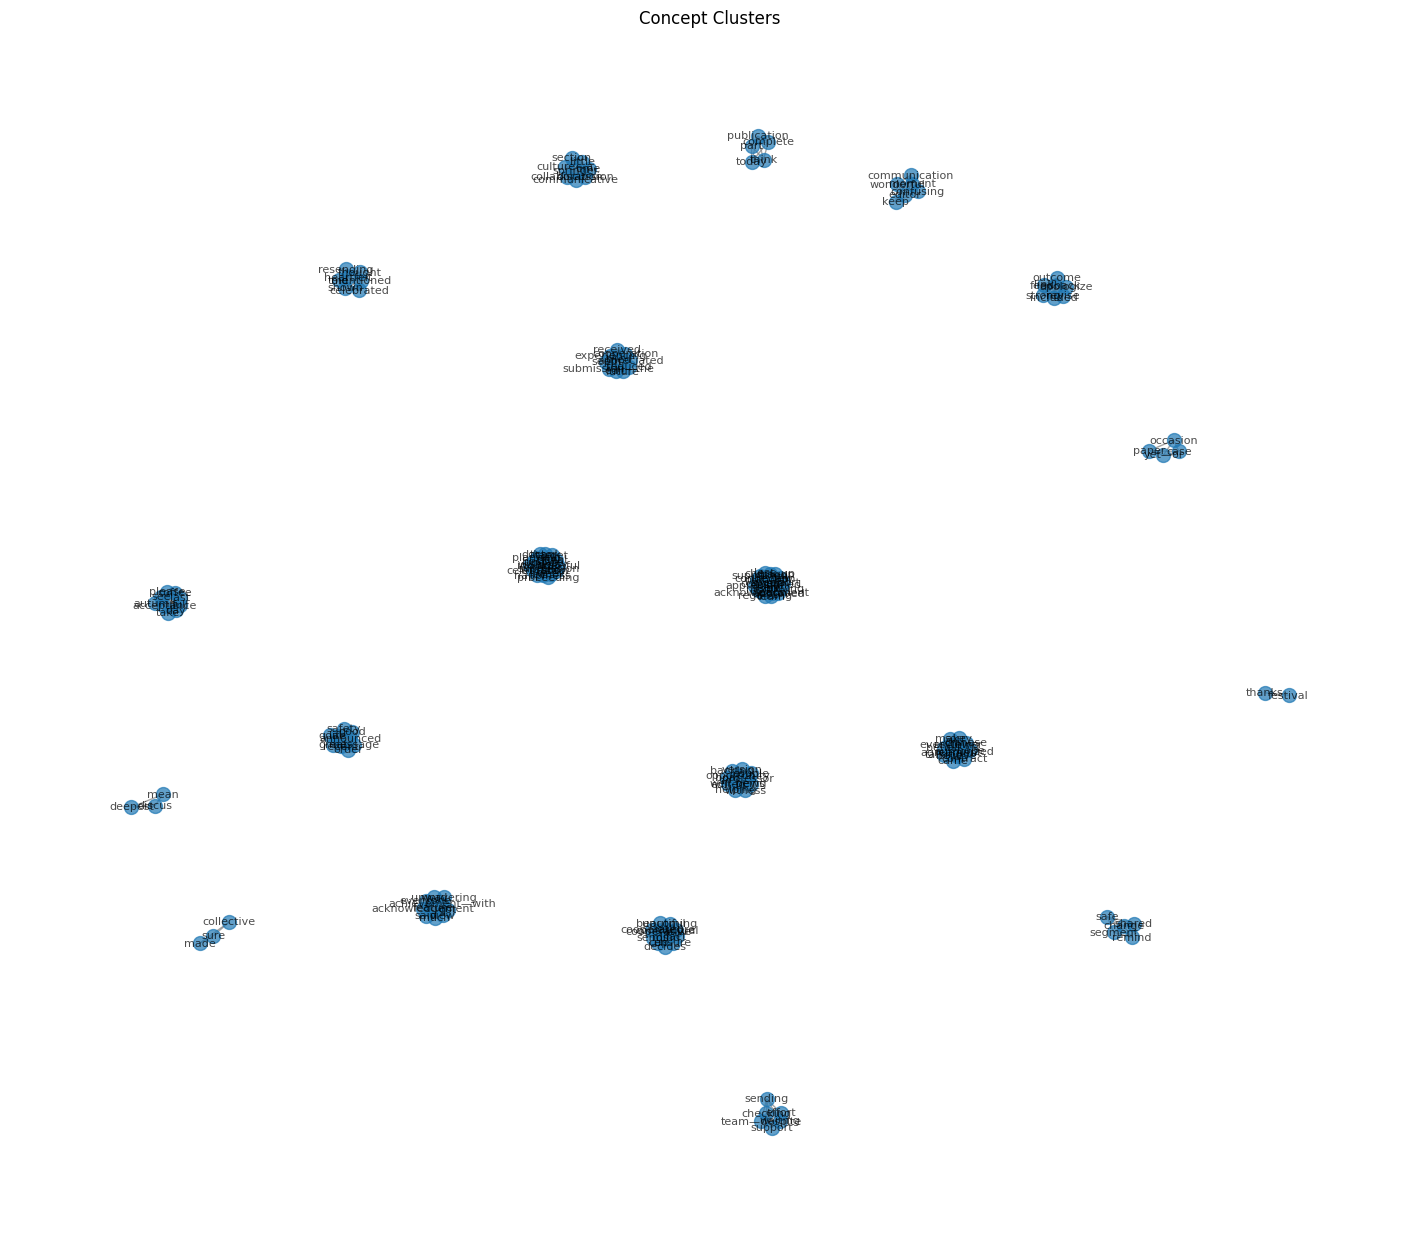

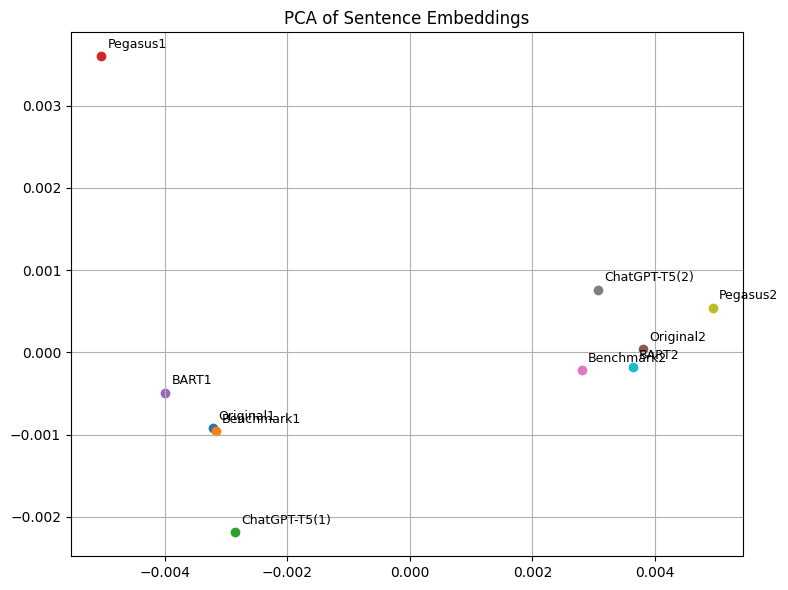

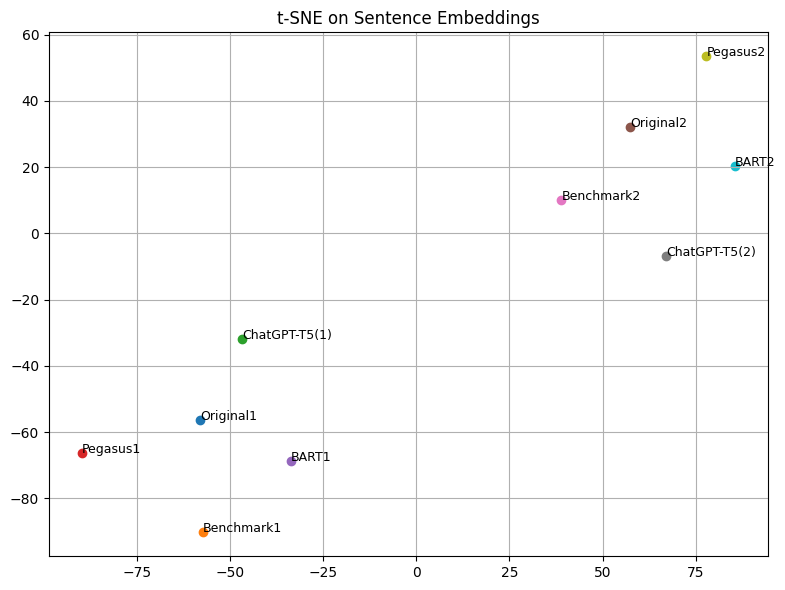

In [ ]:
import nltk
import string
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict
import networkx as nx

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

class CustomNLP:
    def __init__(self, embedding_dim=100):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
        self.stop_words.update(['“', '”', '—', '’', "'s", "n't", "'m"])
        self.vocab = set()
        self.embedding_dim = embedding_dim
        self.word2vec_model = None
        self.word_embeddings = {}

    def preprocess(self, text):
        tokens = word_tokenize(text.lower())
        tokens = [t for t in tokens if t not in string.punctuation]
        tokens = [t for t in tokens if t not in self.stop_words and len(t) > 2]
        tagged = pos_tag(tokens)
        filtered = [
            self.lemmatizer.lemmatize(word)
            for word, tag in tagged
            if tag.startswith(('N', 'V', 'J'))  # Keep only nouns, verbs, adjectives
        ]
        return list(set(filtered))  # Remove duplicates

    def build_vocabulary(self, texts):
        tokenized = [self.preprocess(t) for t in texts]
        for tokens in tokenized:
            self.vocab.update(tokens)
        return tokenized

    def train_word2vec(self, tokenized_texts):
        self.word2vec_model = Word2Vec(
            sentences=tokenized_texts,
            vector_size=self.embedding_dim,
            window=10,
            min_count=1,
            sg=1,  # skip-gram for better semantic capture
            seed=42
        )
        self.word_embeddings = {
            word: self.word2vec_model.wv[word]
            for word in self.word2vec_model.wv.index_to_key
        }

    def get_embedding(self, word):
        return self.word_embeddings.get(word, np.zeros(self.embedding_dim))

    def reduce_dimensions(self, embeddings, n_components=50):
        pca = PCA(n_components=n_components, random_state=42)
        return pca.fit_transform(embeddings)

    def build_concept_clusters(self, n_clusters=20):
        vocab_list = list(self.word_embeddings.keys())
        embeddings = np.array([self.word_embeddings[word] for word in vocab_list])
        reduced = self.reduce_dimensions(embeddings, n_components=min(50, len(embeddings[0])))
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
        labels = kmeans.fit_predict(reduced)
        clusters = defaultdict(list)
        for word, label in zip(vocab_list, labels):
            clusters[label].append(word)
        return clusters

    def visualize_clusters(self, clusters):
        G = nx.Graph()
        for label, words in clusters.items():
            for i in range(len(words)):
                for j in range(i + 1, len(words)):
                    G.add_edge(words[i], words[j], weight=1)
        plt.figure(figsize=(14, 12))
        pos = nx.spring_layout(G, seed=42)
        nx.draw(
            G, pos, with_labels=True, node_size=100, font_size=8,
            edge_color='gray', alpha=0.7
        )
        plt.title("Concept Clusters")
        plt.show()

    def sentence_embedding_weighted(self, sentence):
        tokens = self.preprocess(sentence)
        token_counts = defaultdict(int)
        for token in tokens:
            token_counts[token] += 1
        vectors = [
            self.get_embedding(token) * (1.0 / token_counts[token])
            for token in tokens if token in self.word_embeddings
        ]
        return np.sum(vectors, axis=0) / sum(1.0 / token_counts[t] for t in tokens if t in self.word_embeddings) if vectors else np.zeros(self.embedding_dim)

    def visualize_embeddings(self, texts, labels):
        embeddings = np.array([self.sentence_embedding_weighted(text) for text in texts])
        pca = PCA(n_components=2)
        reduced = pca.fit_transform(embeddings)

        plt.figure(figsize=(8, 6))
        for i, label in enumerate(labels):
            x, y = reduced[i]
            plt.scatter(x, y)
            plt.text(x + 0.0001, y + 0.0001, label, fontsize=9)
        plt.title("PCA of Sentence Embeddings")
        plt.grid(True)
        plt.show()

        tsne = TSNE(n_components=2, random_state=42, perplexity=5)
        reduced_tsne = tsne.fit_transform(embeddings)
        plt.figure(figsize=(8, 6))
        for i, label in enumerate(labels):
            plt.scatter(reduced_tsne[i, 0], reduced_tsne[i, 1])
            plt.text(reduced_tsne[i, 0] + 0.01, reduced_tsne[i, 1] + 0.01, label, fontsize=9)
        plt.title("t-SNE on Sentence Embeddings")
        plt.grid(True)
        plt.show()


    
nlp = CustomNLP(embedding_dim=300)
tokenized_texts = nlp.build_vocabulary(texts)
nlp.train_word2vec(tokenized_texts)

clusters = nlp.build_concept_clusters(n_clusters=20)
print("\nConcept Clusters:")
for label, words in clusters.items():
    print(f"Cluster {label}: {', '.join(words)}")

sentences1 = [t[0] for t in texts_to_compare]
sentences2 = [t[1] for t in texts_to_compare]
full_labels = [t[2] for t in texts_to_compare]

vecs1 = [nlp.sentence_embedding_weighted(s) for s in sentences1]
vecs2 = [nlp.sentence_embedding_weighted(s) for s in sentences2]

sims = [cosine_similarity([v1], [v2])[0, 0] for v1, v2 in zip(vecs1, vecs2)]

print("\nCustomNLP-based Cosine Similarities:")
for label, sim in zip(full_labels, sims):
    print(f"{label} : {sim:.4f}")

nlp.visualize_clusters(clusters)
nlp.visualize_embeddings(texts, labels)